### In this project, we aim to predict house price based on related features

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Print missing data in a table form with percentage in train datasets

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [6]:
# Get columns that has missing value

more_than_1_missing_value = missing_data['Total'] > 1
missing_data[more_than_1_missing_value].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [7]:
# Drop columns which has more than 1 missing value 
# and remove one row that has missing value in 'Electrical' column

train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [8]:
# Drop 'test' columns according to the train data sets

test = test.drop(columns=missing_data[more_than_1_missing_value].index)

In [9]:
# Check there is any remaining mssing value

total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Utilities,2,0.001371
BsmtUnfSF,1,0.000685
BsmtFinSF2,1,0.000685
Exterior2nd,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685


In [10]:
# Replace with median values and 0 according to the EDA

test['MSZoning'] = test['MSZoning'].fillna("RL")
test['Functional'] = test['Functional'].fillna("Typ")
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna("None")
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0.0)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0.0)
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0.0)
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0.0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0.0)
test['Utilities'] = test['Utilities'].fillna("AllPub")
test['Exterior1st'] = test['Exterior1st'].fillna("VinylSd")
test['Exterior2nd'] = test['Exterior2nd'].fillna("VinylSd")
test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0.0)
test['KitchenQual'] = test['KitchenQual'].fillna("TA")
test['SaleType'] = test['SaleType'].fillna("WD")

In [11]:
test.isnull().sum().any()

False

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

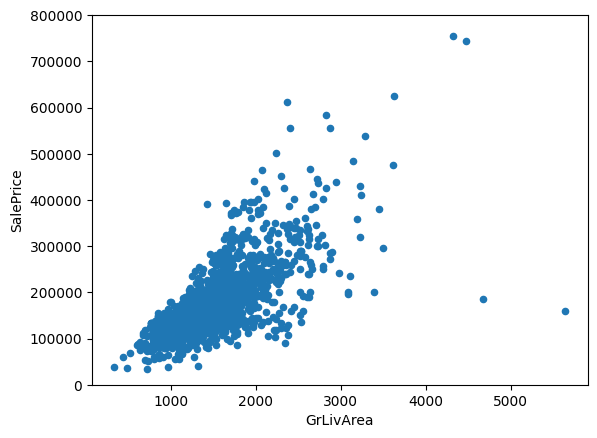

In [12]:
# Check the outliers

var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

# last two plots are outliers

In [13]:
# deleting points

train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [14]:
# Deal with categorical values
# MSSubClass are treat as categorical values
train['MSSubClass'] = train['MSSubClass'].apply(str)

# Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

# MSSubClass are treat as categorical values
test['MSSubClass'] = test['MSSubClass'].apply(str)

# Year and month sold are transformed into categorical features.
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [15]:
train_ID = train['Id']
test_ID = test['Id']

train.drop(columns='Id', inplace=True)
test.drop(columns='Id', inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
test_dict = {}
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cols = list(train.select_dtypes(include='object').columns)
for c in cols:
    lbl = LabelEncoder()
    keys = list(train[c].values)
    # print("key: ", list(dict.fromkeys(keys)))
    test_dict[c] = {}
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))
    values = list(train[c].values)
    # print("value: ", list(dict.fromkeys(values)))

    for x in range(len(list(dict.fromkeys(keys)))):
        test_dict[c][list(dict.fromkeys(keys))[x]] = list(dict.fromkeys(values))[x]

print(test_dict)

    
# HAVE TO MODIFY TEST LABEL ENCODING

cols = list(test.select_dtypes(include='object').columns)
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(test[c].values))
    test[c] = lbl.transform(list(test[c].values))






{'MSSubClass': {'60': 9, '20': 4, '70': 10, '50': 8, '190': 3, '45': 7, '90': 14, '120': 0, '30': 5, '85': 13, '80': 12, '160': 1, '75': 11, '180': 2, '40': 6}, 'MSZoning': {'RL': 3, 'RM': 4, 'C (all)': 0, 'FV': 1, 'RH': 2}, 'Street': {'Pave': 1, 'Grvl': 0}, 'LotShape': {'Reg': 3, 'IR1': 0, 'IR2': 1, 'IR3': 2}, 'LandContour': {'Lvl': 3, 'Bnk': 0, 'Low': 2, 'HLS': 1}, 'Utilities': {'AllPub': 0, 'NoSeWa': 1}, 'LotConfig': {'Inside': 4, 'FR2': 2, 'Corner': 0, 'CulDSac': 1, 'FR3': 3}, 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2}, 'Neighborhood': {'CollgCr': 5, 'Veenker': 24, 'Crawfor': 6, 'NoRidge': 15, 'Mitchel': 11, 'Somerst': 21, 'NWAmes': 14, 'OldTown': 17, 'BrkSide': 3, 'Sawyer': 19, 'NridgHt': 16, 'NAmes': 12, 'SawyerW': 20, 'IDOTRR': 9, 'MeadowV': 10, 'Edwards': 7, 'Timber': 23, 'Gilbert': 8, 'StoneBr': 22, 'ClearCr': 4, 'NPkVill': 13, 'Blmngtn': 0, 'BrDale': 2, 'SWISU': 18, 'Blueste': 1}, 'Condition1': {'Norm': 2, 'Feedr': 1, 'PosN': 4, 'Artery': 0, 'RRAe': 5, 'RRNn': 8, 'RRAn': 6, 

In [18]:
print(test_dict['MSSubClass']['60'])

9


Cannot plot HalfBath graph
Cannot plot BedroomAbvGr graph
Cannot plot KitchenAbvGr graph
Cannot plot KitchenQual graph
Cannot plot TotRmsAbvGrd graph
Cannot plot Functional graph
Cannot plot Fireplaces graph
Cannot plot GarageCars graph
Cannot plot GarageArea graph
Cannot plot PavedDrive graph
Cannot plot WoodDeckSF graph
Cannot plot OpenPorchSF graph
Cannot plot EnclosedPorch graph
Cannot plot 3SsnPorch graph
Cannot plot ScreenPorch graph
Cannot plot PoolArea graph
Cannot plot MiscVal graph
Cannot plot MoSold graph
Cannot plot YrSold graph
Cannot plot SaleType graph
Cannot plot SaleCondition graph


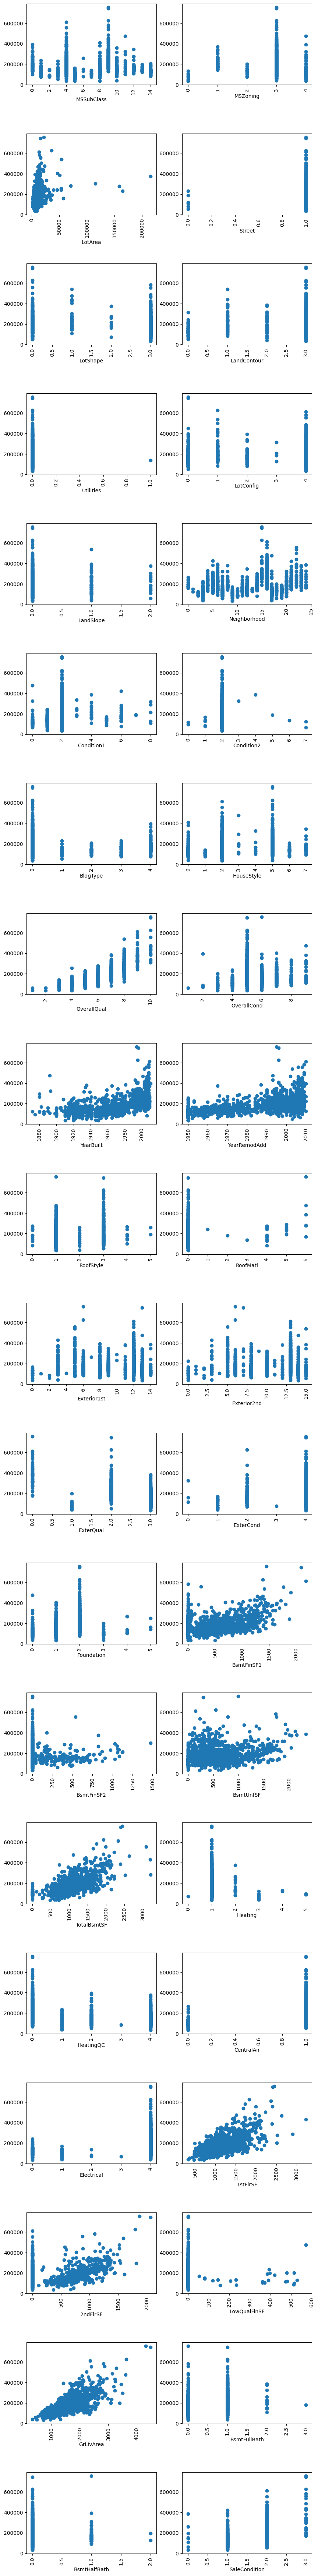

In [17]:
fig, ax = plt.subplots(20, 2, figsize=(10, 90))
i = 0
for col in train.columns:
    if col == "SalePrice":
        break
    try:
        plt.subplot(20, 2, i+1)
        plt.scatter(x=train[col], y=train['SalePrice'])
        plt.xlabel(col)
        plt.xticks(rotation=90)
        i += 1
    except:
        print("Cannot plot {} graph".format(col))
        plt.xlabel(col)

plt.subplots_adjust(hspace=0.6)
plt.show()


In [18]:
# Drop outlier in LotArea
train[train['LotArea'] > 200000].index
train.drop(index=train[train['LotArea'] > 200000].index, inplace=True)

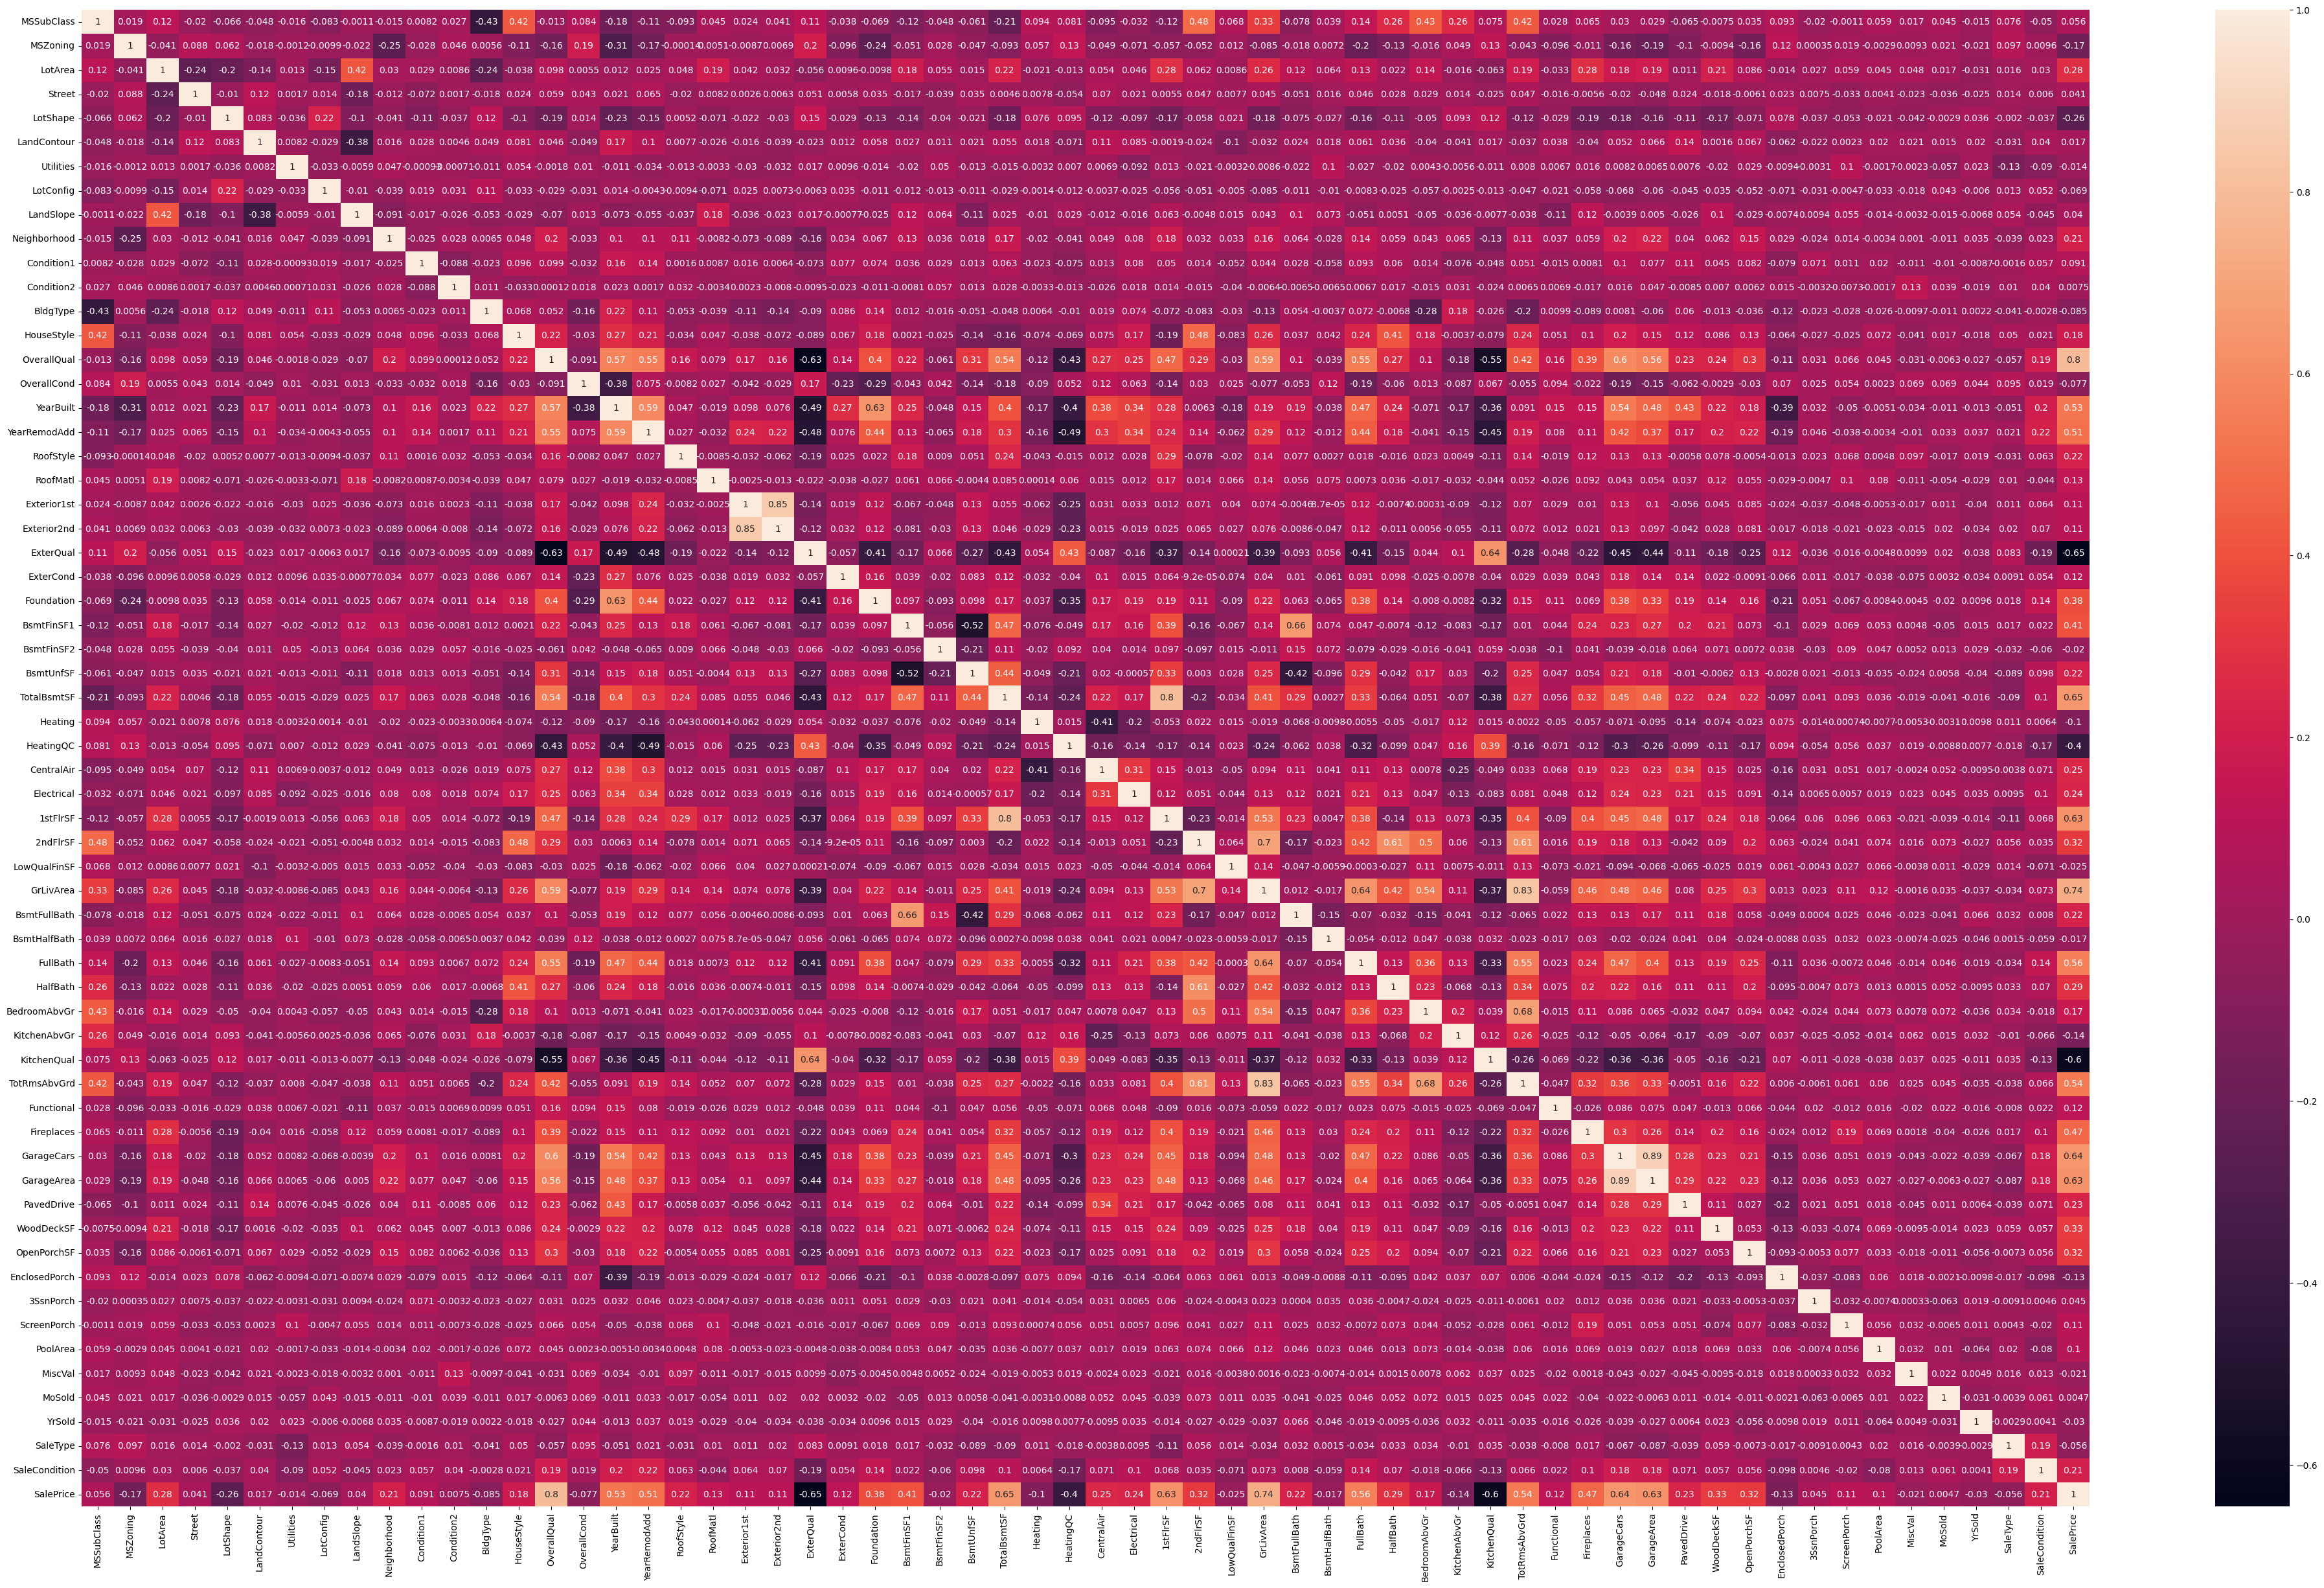

In [19]:
plt.subplots(figsize=(50,30))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [21]:
# split train datasets into feature X and target y
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = train.drop(columns='SalePrice')
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
    # Add other hyperparameters and their values to explore
}
rf = RandomForestRegressor(random_state=42)


In [23]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [24]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(best_params)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
max_depth = None
min_samples_split = 2
n_estimators = 200

best_rf = RandomForestRegressor(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=n_estimators)
best_rf.fit(X, y)

RandomForestRegressor(n_estimators=200)

In [26]:
result = best_rf.predict(test)
result_df = pd.DataFrame(result, columns=['SalePrice'])
result_df['Id'] = test_ID
result_df = result_df[['Id', 'SalePrice']]

In [27]:
result_df.to_csv("simplified_result_using_rf.csv", index=False)

In [28]:
import pickle

# Specify the file path where you want to save the model
filename = 'simplified_model_rf.pkl'

# Save the model to the file
with open(filename, 'wb') as file:
    pickle.dump(best_rf, file)

### Light GBM

In [23]:
# LightGBM model

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
}

# Create the LightGBM regressor
lgb_model = lgb.LGBMRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.05, 'n_estimators': 300, 'num_leaves': 20}
Best Score:  0.9044587561702302


In [29]:
params = {
    'learning_rate' : 0.05,
    'n_estimators' : 300,
    'num_leaves' : 20
}

In [31]:
simplified_gbm_model = lgb.LGBMRegressor(**params)
simplified_gbm_model.fit(X,y)

LGBMRegressor(learning_rate=0.05, n_estimators=300, num_leaves=20)

In [32]:
gbm_result = simplified_gbm_model.predict(test)
result_df = pd.DataFrame(gbm_result, columns=['SalePrice'])
result_df['Id'] = test_ID
result_df = result_df[['Id', 'SalePrice']]

In [33]:
result_df.to_csv("simplified_results_using_gbm.csv", index=False)

In [34]:
import pickle

# Specify the file path where you want to save the model
filename = 'simplified_model_gbm.pkl'

# Save the model to the file
with open(filename, 'wb') as file:
    pickle.dump(simplified_gbm_model, file)